In [1]:
# 下载数据集
import torchvision
import torchvision.transforms as tranforms

data_dir = './PytorchLearning/'
tranform = tranforms.Compose([tranforms.ToTensor()])
train_dataset = torchvision.datasets.FashionMNIST(data_dir, train=True, transform = tranform, download = True)

100%|██████████| 26421880/26421880 [08:58<00:00, 49053.65it/s] 


Extracting ./PytorchLearning/FashionMNIST\raw\train-images-idx3-ubyte.gz to ./PytorchLearning/FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 181329.71it/s]


Extracting ./PytorchLearning/FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./PytorchLearning/FashionMNIST\raw



100%|██████████| 4422102/4422102 [01:12<00:00, 61376.34it/s]


Extracting ./PytorchLearning/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./PytorchLearning/FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<?, ?it/s]

Extracting ./PytorchLearning/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./PytorchLearning/FashionMNIST\raw



训练数据集条数 60000
测试数据集条数 10000


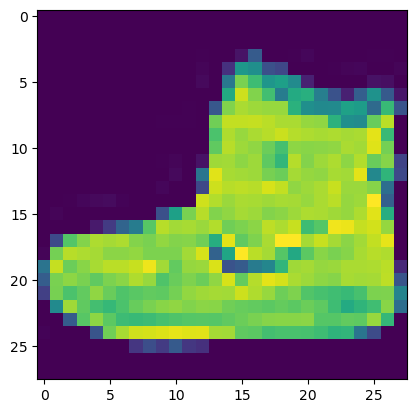

该图片的标签为： 9


In [2]:
import torch
import torchvision
import torchvision.transforms as tranforms

print("训练数据集条数",len(train_dataset))
val_dataset  = torchvision.datasets.FashionMNIST(root=data_dir, train=False, transform=tranform)
print("测试数据集条数",len(val_dataset))
import pylab
im = train_dataset[0][0]
im = im.reshape(-1,28)
pylab.imshow(im)
pylab.show()
print("该图片的标签为：",train_dataset[0][1])

In [6]:
import torch

batch_size = 10
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

样本形状： torch.Size([10, 1, 28, 28])
样本标签： tensor([1, 2, 3, 3, 7, 2, 4, 7, 6, 7])
图片形状： torch.Size([3, 32, 302])
Trouser,Pullover,Dress,Dress,Sneaker,Pullover, Coat,Sneaker,Shirt,Sneaker


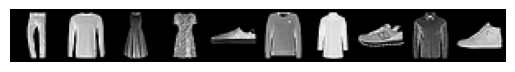

In [8]:
from matplotlib import pyplot as plt
import numpy as np
import torch

def imshow(img):
    print("图片形状：",np.shape(img))
    npimg = img.numpy()
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

classes = ('T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_Boot')
sample = iter(train_loader)
images, labels = next(sample) # 命令形式需要版本适配
print('样本形状：',np.shape(images))
print('样本标签：',labels)
imshow(torchvision.utils.make_grid(images,nrow=batch_size))
print(','.join('%5s' % classes[labels[j]] for j in range(len(images))))

myConNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)
cuda:0
[1,  1000] loss: 0.434
[1,  2000] loss: 0.311
[1,  3000] loss: 0.300
[1,  4000] loss: 0.285
[1,  5000] loss: 0.277
[1,  6000] loss: 0.268
[2,  1000] loss: 0.256
[2,  2000] loss: 0.264
[2,  3000] loss: 0.274
[2,  4000] loss: 0.270
[2,  5000] loss: 0.261
[2,  6000] loss: 0.265
Finished Training
图片形状： torch.Size([3, 32, 302])
真实标签:  Ankle_Boot Pullover Trouser Trouser Shirt Trouser  Coat Shirt Sandal Sneaker
预测结果:  Ankle_Boot Pullover Trouser Trouser Shirt Trouser Pullover Shirt Sneaker Sneaker
Accuracy of T-shirt : 69 %
Accuracy of Trouser : 94 %
Accuracy of Pullover : 74 %
Accuracy of Dress : 84 %
Accuracy of  Coat : 73 %
Accuracy of Sandal : 86 %
Accuracy of Shirt : 42 %

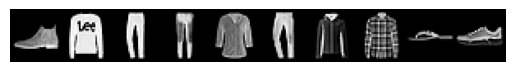

In [13]:
# 构建模型
from torch.nn import functional as F

class myConNet(torch.nn.Module):
    def __init__(self):
        super(myConNet, self).__init__()
        #定义卷积层
        self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = torch.nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        #定义全连接层
        self.fc1 = torch.nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = torch.nn.Linear(in_features=120, out_features=60)
        self.out = torch.nn.Linear(in_features=60, out_features=10)

    def forward(self, t):#搭建正向结构
        #第一层卷积和池化处理
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        #第二层卷积和池化处理
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        #搭建全连接网络，第一层全连接
        t = t.reshape(-1, 12 * 4 * 4)#将卷积结果由4维变为2维
        t = self.fc1(t)
        t = F.relu(t)
        #第二层全连接
        t = self.fc2(t)
        t = F.relu(t)
        #第三层全连接
        t = self.out(t)
        return t
    
if __name__ == '__main__':  

    network = myConNet()
    print(network)#打印网络
    
    ##指定设备
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(device)
    network.to(device)

    criterion = torch.nn.CrossEntropyLoss()  #实例化损失函数类
    optimizer = torch.optim.Adam(network.parameters(), lr=.01)

    for epoch in range(2): #数据集迭代2次
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0): #循环取出批次数据
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device) #
            optimizer.zero_grad()#清空之前的梯度
            outputs = network(inputs)
            loss = criterion(outputs, labels)#计算损失
            loss.backward()  #反向传播
            optimizer.step() #更新参数
    
            running_loss += loss.item()
            if i % 1000 == 999:
                print('[%d, %5d] loss: %.3f' %
                    (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
    
    print('Finished Training')
    # 保存模型
    torch.save(network.state_dict(), './CNNFashionMNIST.pth')

    network.load_state_dict(torch.load( './CNNFashionMNIST.pth'))#加载模型
    
    #使用模型
    dataiter = iter(test_loader)
    images, labels = next(dataiter)
    inputs, labels = images.to(device), labels.to(device)
    
    imshow(torchvision.utils.make_grid(images,nrow=batch_size))
    print('真实标签: ', ' '.join('%5s' % classes[labels[j]] for j in range(len(images))))
    outputs = network(inputs)
    _, predicted = torch.max(outputs, 1)
    
    
    print('预测结果: ', ' '.join('%5s' % classes[predicted[j]]
                                  for j in range(len(images))))
    
    #测试模型
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            inputs, labels = images.to(device), labels.to(device)
            outputs = network(inputs)
            _, predicted = torch.max(outputs, 1)
            predicted = predicted.to(device)
            c = (predicted == labels).squeeze()
            for i in range(10):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1
    
    sumacc = 0
    for i in range(10):
        Accuracy = 100 * class_correct[i] / class_total[i]
        print('Accuracy of %5s : %2d %%' % (classes[i], Accuracy ))
        sumacc =sumacc+Accuracy
    print('Accuracy of all : %2d %%' % ( sumacc/10. ))